In [1]:
import numpy as np
import pandas as pd
import math
import os
import PIL
import sys
import PIL.Image
from PIL import Image
from io import StringIO
import tensorflow as tf
from zipfile import ZipFile
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [2]:
img=Image.open('img (1).jpg') #importing using PIL

In [3]:
print(img.format)

JPEG


In [4]:
img1=np.asarray(img)#Converting it to nparray for standard applications

In [5]:
img1.shape

(1235, 1653, 3)

In [6]:
# pip install opencv-python
# pip install git+git://github.com/jaidedai/easyocr.git

In [7]:
import cv2

In [8]:
img=cv2.imread('img (1).jpg',1)

In [9]:
# cv2.imshow('color img',img)
# cv2.waitKey(0)
# cv2.destoryAllWindows()

In [10]:
#glob
import glob

In [11]:
path="Users/shridhar/Hackathon Dr. reddy*.JPG"

path1='Users/shridhar/OneDrive - smail.iitm.ac.in/Desktop'

In [12]:
# !pip install pytesseract

In [13]:
import os
import pytesseract
from PIL import Image
import pandas as pd

def extract_text_from_image(image_path):
    try:
        # Open the image using PIL (Python Imaging Library)
        image = Image.open(image_path)
        
        # Use pytesseract to extract text from the image
        extracted_text = pytesseract.image_to_string(image)
        
        return extracted_text
    except Exception as e:
        print(f"An error occurred while processing {image_path}: {e}")
        return None

# Path to the folder containing images
folder_path = 'test_set/'

# Create an empty DataFrame to store the extracted texts
data = {'Image Name': [], 'Extracted Text': []}
df = pd.DataFrame(data)

# Iterate through all image files in the folder
for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
        image_path = os.path.join(folder_path, filename)
        extracted_text = extract_text_from_image(image_path)
        
        if extracted_text:
            df = df.append({'Image Name': filename, 'Extracted Text': extracted_text}, ignore_index=True)
        else:
            print(f"Text extraction failed for {filename}.")

# Save the DataFrame to a CSV file
output_csv = 'extracted_texts.csv'
df.to_csv(output_csv, index=False)
print(f"Extracted texts saved to {output_csv}")


An error occurred while processing test_set/img (1).jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Text extraction failed for img (1).jpg.
An error occurred while processing test_set/img (10).jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Text extraction failed for img (10).jpg.
An error occurred while processing test_set/img (11).jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Text extraction failed for img (11).jpg.
An error occurred while processing test_set/img (12).jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Text extraction failed for img (12).jpg.
An error occurred while processing test_set/img (13).jpg: tesseract is not installed or it's not in your PATH. See README file for more information.
Text extraction failed for img (13).jpg.
An error occurred while processing test_set/img (14)

In [14]:
filenames = glob.glob("test_set/*.jpg")
filenames.sort()
images = [cv2.imread(img) for img in filenames]

# for img in images:
# #     print(img)

In [15]:
for i in range(len(images)):
    print(images[i].shape)

(1235, 1653, 3)
(1600, 2134, 3)
(1600, 2134, 3)
(1653, 2339, 3)
(1235, 1653, 3)
(512, 683, 3)
(1653, 2339, 3)
(1653, 2339, 3)
(1600, 2134, 3)
(1235, 1653, 3)
(1653, 2339, 3)
(1653, 2339, 3)
(1600, 2134, 3)
(1600, 2134, 3)
(1600, 2134, 3)
(1653, 2339, 3)
(1600, 2134, 3)
(512, 683, 3)
(512, 683, 3)
(1653, 2339, 3)
(1600, 2134, 3)


In [16]:
import easyocr
import cv2

#For the first time it downloads the models for the languages chosen below. 
#Not all languages are compatible with each other so you cannot put
#multiple languages below
#reader = easyocr.Reader(['hi', 'te', 'en'])  #Hindi, telugu, and English
#The above gives error that Telugu is only compatible with English.

#So let us just use Hindi and English 
#To use GPU you need to have CUDA configured for the pytorch library.
reader = easyocr.Reader(['hi', 'en'], gpu=False)  #Hindi, telugu, and English

img = cv2.imread('img (10).jpg')


results = reader.readtext(img, detail=1, paragraph=False) #Set detail to 0 for simple text output
#Paragraph=True will combine all results making it easy to capture it in a dataframe. 


#To display the text on the original image or show bounding boxes
#we need the coordinates for the text. So make sure the detail=1 above, readtext.
# display the OCR'd text and associated probability
for (bbox, text, prob) in results:
    
    #Define bounding boxes
    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))
    
    #Remove non-ASCII characters to display clean text on the image (using opencv)
    text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
   
    #Put rectangles and text on the image
    cv2.rectangle(img, tl, br, (0, 255, 0), 2)
    cv2.putText(img, text, (tl[0], tl[1] - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
# show the output image
# cv2.imshow("Image", img)
# cv2.waitKey(0)

#####################################################################



Using CPU. Note: This module is much faster with a GPU.


In [17]:
results
texts=[x[1] for x in results]
locations=[x[0] for x in results]

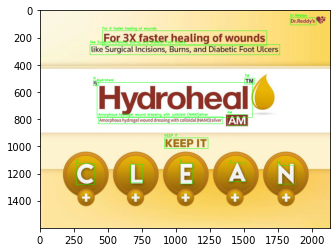

In [18]:
# # pip3 install torch torchvision torchaudio
plt.imshow(img)
plt.show()

In [19]:
#Read multiple images in a directory, extract text using OCR and capture 
# it in a pandas dataframe. 
import cv2
import glob
import pandas as pd

# #select the path
path = "test_set/*.jpg"
img_number = 1 
reader = easyocr.Reader(['en'])  #English
df=pd.DataFrame()
L = []
for file in glob.glob(path):
    img= cv2.imread(file, 0)  #now, we can read each file since we have the full path
    results = reader.readtext(img, detail=1, paragraph=True) #Set detail to 0 for simple text output
    texts=[x[1] for x in results]
    locations=[x[0] for x in results]
    dat= [[file, texts, locations]]
    L.append(dat)
    img_number +=1

#     df.insert(0, 'file', file)
#     df.insert(1, 'locations', locations)
#     df.insert(2, 'text', texts)
#     df['image']=df.append(list(file), ignore_index=True)
#     df['detected_text']=df['detected_text'].append(texts, ignore_index=True)
#     df['locations']=df['locations'].append(loacations, ignore_index=True)
#     df = df.append(pd.DataFrame({'image': file, 'detected_text':texts,'location':locations}, index=[0]), ignore_index=True)
       

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [20]:
L=np.array(L)

<ipython-input-20-93369efff158>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  L=np.array(L)


In [21]:
# df = pd.DataFrame(L[][], columns = )

In [22]:
# names = ['file', 'texts', 'locations']
# index = pd.MultiIndex.from_product([range(s)for s in L.shape], names=names)
# df = pd.DataFrame({'A': L.flatten()}, index=index)

In [23]:
# L.shape

In [24]:
a,b,c = L.shape
df= pd.DataFrame(L.reshape(21,-1),index=np.repeat(np.arange(a),b),columns=['file', 'texts', 'locations'] )

In [25]:
# a = np.array([[1,2,3], [4,5,6]])
# a.reshape(6,-1)

In [26]:
df['words']=0
for i in range(len(df)):
    df['words'][i]=[word for line in df['texts'][i] for word in line.split()]

<ipython-input-26-3c5ebd20cdeb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['words'][i]=[word for line in df['texts'][i] for word in line.split()]
C:\Users\shridhar\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [27]:
df['total_words']=0
for i in range(len(df)):
    df['total_words'][i]=len(df['words'][i])


<ipython-input-27-bf322f159c30>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_words'][i]=len(df['words'][i])


In [28]:
# df.to_excel('text.xlsx')

In [29]:
df

,file,texts,locations,words,total_words
0,test_set\img (1).jpg,"[DrReddys, In cough associated with cold R ZED...","[[[1439, 48], [1561, 48], [1561, 78], [1439, 7...","[DrReddys, In, cough, associated, with, cold, ...",67
1,test_set\img (10).jpg,"[Dr Reddys, For 3X faster healing of wounds li...","[[[1835, 63], [2023, 63], [2023, 107], [1835, ...","[Dr, Reddys, For, 3X, faster, healing, of, wou...",35
2,test_set\img (11).jpg,"[nisegel_ Tough on Pain, Back Pain, Knee Pain,...","[[[1364, 18], [1955, 18], [1955, 267], [1364, ...","[nisegel_, Tough, on, Pain, Back, Pain, Knee, ...",61
3,test_set\img (12).jpg,"[Treatment of Dyslipidemia patients based on, ...","[[[653, 173], [1685, 173], [1685, 260], [653, ...","[Treatment, of, Dyslipidemia, patients, based,...",77
4,test_set\img (13).jpg,"[In Hypertensive Patients With CKD, D A Y Stai...","[[[103, 123], [715, 123], [715, 500], [103, 50...","[In, Hypertensive, Patients, With, CKD,, D, A,...",55
5,test_set\img (14).jpg,"[Dr-Redats, The only guardian mouthwash;, with...","[[[612, 16], [652, 16], [652, 24], [612, 24]],...","[Dr-Redats, The, only, guardian, mouthwash;, w...",71
6,test_set\img (15).jpg,"[Dr Reddy's, DAY 3, Continued long term releas...","[[[2030, 73], [2148, 73], [2148, 101], [2030, ...","[Dr, Reddy's, DAY, 3, Continued, long, term, r...",80
7,test_set\img (16).jpg,"[DrReddys, Continued long term release of Ca a...","[[[2026, 71], [2147, 71], [2147, 108], [2026, ...","[DrReddys, Continued, long, term, release, of,...",37
8,test_set\img (17).jpg,"[Senile Xerosis causes intense skin drynessio,...","[[[94, 124], [864, 124], [864, 276], [94, 276]...","[Senile, Xerosis, causes, intense, skin, dryne...",56
9,test_set\img (18).jpg,"[Die Reddys, 'THE ITCH' TAKES CONTROL OVER YOU...","[[[1295, 59], [1503, 59], [1503, 122], [1295, ...","[Die, Reddys, 'THE, ITCH', TAKES, CONTROL, OVE...",21


In [30]:
coordinates=df['locations'].values
# print(coordinates)
differences = []
for lst in coordinates:
    temp=[]
    for alst in lst:
#         if count<=21:
#             count+=1
        diff_x = alst[1][0] - alst[0][0]
        diff_y = alst[2][1] - alst[0][1]
        temp.append([diff_x, diff_y])
    differences.append(temp)

# print(differences)

ar=np.array(differences,dtype=object)


In [31]:
#finding text areas of word clusters
text_areas=[]
for lst in ar:
    temp=[]
    for alst in lst:
        temp_a=alst[0]*alst[1]
        temp.append(temp_a)
    text_areas.append(temp)
    
    

In [32]:
#total text areas
total_text_areas=[]
for i in range(len(text_areas)):
    temp=sum(text_areas[i])
    total_text_areas.append(temp)
df['total_text_areas']=total_text_areas

In [33]:
##finding centers of the word clusters
coordinates=df['locations'].values
# print(coordinates)
centers = []
for lst in coordinates:
    temp=[]
    for alst in lst:
#         if count<=21:
#             count+=1
        c_x = (alst[1][0] + alst[0][0])/2
        c_y = (alst[2][1] + alst[0][1])/2
        temp.append([c_x, c_y])
    centers.append(temp)

# print(differences)

ar_c=np.array(centers,dtype=object)

In [34]:
df['text areas']=text_areas
df['center of texts']=centers

In [35]:
image_centers=[]
image_area=[]
for i in range(len(images)):
    ci_x=images[i].shape[0]/2
    ci_y=images[i].shape[1]/2
    i_area=images[i].shape[1]*images[i].shape[0]
    image_centers.append([ci_x,ci_y])
    image_area.append(i_area)

In [36]:
df['image area']=image_area
df['image center']=image_centers

In [37]:
#finding number of text clusters
text_clusters=[]
for lst in ar:
    text_clusters.append(len(lst))
#     temp=[]
#     for alst in lst:
#         temp_a=alst[0]*alst[1]
#         temp.append(temp_a)
#     text_areas.append(temp)

In [38]:
df['no. of text clusters']=text_clusters

In [39]:
## to find out text cluster area ratio to image ratio
size_ratio=[]
for i in range(len(text_areas)):
    temp_r=[x/image_area[i] for x in text_areas[i]]
    size_ratio.append(temp_r)
df['text_size_ratio']=size_ratio

In [40]:
from sklearn.metrics import mean_squared_error as mse
import numpy as np
c_all_tx=[]
for i in range(len(text_areas)):
        c_tx=[df['center of texts'][i][count] for count,x in enumerate(df['text_size_ratio'][i]) if x >= 0.025]
        c_im=[df['image center'][i] for x in df['text_size_ratio'][i] if x >= 0.08]
        c_all_tx.append(c_tx)

In [41]:
dist=[]
for i in range(len(text_areas)):
    t=0
    for j in range(len(c_all_tx[i])):
        t=+mse(c_all_tx[i][j],df['image center'][i])
    dist.append(t)


In [42]:
c_all_tx

[[[469.5, 404.0], [553.5, 769.5], [549.5, 922.5]],
 [[1062.0, 238.5], [980.0, 674.0]],
 [[1659.5, 142.5]],
 [[1250.0, 485.0], [1185.0, 1041.0], [1809.0, 1117.5]],
 [[409.0, 311.5], [1285.0, 487.0], [828.5, 781.5]],
 [[340.0, 52.0], [341.0, 82.5], [335.0, 173.0], [544.5, 439.5]],
 [[1564.0, 387.5], [821.0, 1247.5]],
 [[1564.0, 387.5], [561.5, 1225.0]],
 [[479.0, 200.0], [1600.0, 723.0]],
 [[1176.5, 663.0]],
 [[1298.5, 263.5], [1006.0, 540.5], [576.5, 813.0]],
 [[722.0, 518.0], [583.0, 953.0]],
 [[1136.5, 1056.5]],
 [[562.5, 319.0],
  [1492.5, 368.5],
  [528.0, 690.0],
  [518.5, 898.0],
  [522.0, 1156.0]],
 [[1080.0, 389.0]],
 [[692.0, 506.5], [704.0, 945.0]],
 [[542.5, 515.5], [493.5, 1034.0], [431.5, 1406.5]],
 [[528.0, 172.0], [341.5, 407.0]],
 [[331.0, 84.0], [216.0, 194.5], [507.0, 395.0]],
 [[686.5, 190.5], [1441.0, 831.0], [550.5, 959.0]],
 [[1018.5, 320.0], [1060.0, 667.5], [597.0, 1422.0]]]

In [43]:
df['dev from center']=dist

In [44]:
df

,file,texts,locations,words,total_words,total_text_areas,text areas,center of texts,image area,image center,no. of text clusters,text_size_ratio,dev from center
0,test_set\img (1).jpg,"[DrReddys, In cough associated with cold R ZED...","[[[1439, 48], [1561, 48], [1561, 78], [1439, 7...","[DrReddys, In, cough, associated, with, cold, ...",67,460250,"[3660, 249220, 9180, 60375, 35182, 57267, 6864...","[[1500.0, 63.0], [469.5, 404.0], [1267.5, 696....",2041455,"[617.5, 826.5]",10,"[0.0017928389310565259, 0.12207959519068508, 0...",6920.000
1,test_set\img (10).jpg,"[Dr Reddys, For 3X faster healing of wounds li...","[[[1835, 63], [2023, 63], [2023, 107], [1835, ...","[Dr, Reddys, For, 3X, faster, healing, of, wou...",35,783984,"[8272, 249168, 412300, 24960, 21488, 13440, 14...","[[1929.0, 85.0], [1062.0, 238.5], [980.0, 674....",3414400,"[800.0, 1067.0]",9,"[0.002422680412371134, 0.07297563261480787, 0....",93424.500
2,test_set\img (11).jpg,"[nisegel_ Tough on Pain, Back Pain, Knee Pain,...","[[[1364, 18], [1955, 18], [1955, 267], [1364, ...","[nisegel_, Tough, on, Pain, Back, Pain, Knee, ...",61,519714,"[147159, 3276, 3328, 59630, 26028, 42291, 3328...","[[1659.5, 142.5], [363.0, 397.0], [738.0, 397....",3414400,"[800.0, 1067.0]",18,"[0.04309951968134958, 0.0009594657919400187, 0...",796720.250
3,test_set\img (12).jpg,"[Treatment of Dyslipidemia patients based on, ...","[[[653, 173], [1685, 173], [1685, 260], [653, ...","[Treatment, of, Dyslipidemia, patients, based,...",77,1312931,"[89784, 692144, 68136, 141340, 221490, 69296, ...","[[1169.0, 216.5], [1250.0, 485.0], [526.0, 933...",3866367,"[826.5, 1169.5]",8,"[0.023221799689475936, 0.17901663240970142, 0....",484005.125
4,test_set\img (13).jpg,"[In Hypertensive Patients With CKD, D A Y Stai...","[[[103, 123], [715, 123], [715, 500], [103, 50...","[In, Hypertensive, Patients, With, CKD,, D, A,...",55,513868,"[230724, 118556, 41382, 88367, 8427, 2232, 230...","[[409.0, 311.5], [1285.0, 487.0], [827.0, 708....",2041455,"[617.5, 826.5]",13,"[0.11301939058171745, 0.058074265658562156, 0....",23273.000
5,test_set\img (14).jpg,"[Dr-Redats, The only guardian mouthwash;, with...","[[[612, 16], [652, 16], [652, 24], [612, 24]],...","[Dr-Redats, The, only, guardian, mouthwash;, w...",71,86973,"[320, 15276, 18944, 16128, 8022, 576, 2080, 52...","[[632.0, 20.0], [340.0, 52.0], [341.0, 82.5], ...",349696,"[256.0, 341.5]",13,"[0.0009150805270863836, 0.04368365666178624, 0...",46418.125
6,test_set\img (15).jpg,"[Dr Reddy's, DAY 3, Continued long term releas...","[[[2030, 73], [2148, 73], [2148, 101], [2030, ...","[Dr, Reddy's, DAY, 3, Continued, long, term, r...",80,704203,"[3304, 8580, 117832, 10192, 8778, 1216, 840, 6...","[[2089.0, 87.0], [615.5, 337.0], [1564.0, 387....",3866367,"[826.5, 1169.5]",19,"[0.0008545489861671176, 0.0022191375003976603,...",3057.125
7,test_set\img (16).jpg,"[DrReddys, Continued long term release of Ca a...","[[[2026, 71], [2147, 71], [2147, 108], [2026, ...","[DrReddys, Continued, long, term, release, of,...",37,549354,"[4477, 117832, 82137, 56270, 31296, 7200, 250142]","[[2086.5, 89.5], [1564.0, 387.5], [1770.5, 734...",3866367,"[826.5, 1169.5]",7,"[0.0011579345675151894, 0.0304761550054612, 0....",36652.625
8,test_set\img (17).jpg,"[Senile Xerosis causes intense skin drynessio,...","[[[94, 124], [864, 124], [864, 276], [94, 276]...","[Senile, Xerosis, causes, intense, skin, dryne...",56,649819,"[117040, 720, 52580, 21016, 264408, 32883, 420...","[[479.0, 200.0], [1389.0, 151.0], [1832.0, 160...",3414400,"[800.0, 1067.0]",19,"[0.03427835051546392, 0.00021087160262417995, ...",379168.000
9,test_set\img (18).jpg,"[Die Reddys, 'THE ITCH' TAKES CONTROL OVER YOU...","[[[1295, 59], [1503, 59], [1503, 122], [1295, ...","[Die, Reddys, 'THE, ITCH', TAKES, CONTROL, OVE...",21,410820,"[13104, 397716]","[[1399.0, 90.5], [1176.5, 663.0]]",2041455,"[617.5, 826.5]",2,"[0.006418951189225332, 0.1948198711213326]",169606.625


In [45]:
score1=[1/abs(x-30) for x in df['total_words']]  ## based on number of words

In [46]:
score2=[1/abs(x-6) for x in df['no. of text clusters']] ## no of text clusters

In [47]:
score3=[1/x for x in df['dev from center']] ## center deviation 

In [48]:
## to find out text cluster area ratio to image ratio
total_size_ratio=[]
for i in range(len(text_areas)):
    temp_totr=df['total_text_areas'][i]/image_area[i]
    total_size_ratio.append(temp_totr)
score4=[1/abs(x-0.43) for x in total_size_ratio]

In [54]:
a=0.5
b=0.2
c=0.15
d=0.15
score_all_4=list(a*np.array(score1)+b*np.array(score2)+c*np.array(score3)+d*np.array(score4))

In [55]:
# temp_scoreall=[]
# for i in range(len(score4)):
#     temp_scoreall.append(score_all_4[i]/image_area[i]*10e6)
    

In [56]:
score_all_4

[0.7939839838463751,
 0.8485459078919788,
 0.5688428725984458,
 1.7676502518688912,
 0.8842204052952349,
 0.8657835965678489,
 0.6289365688942816,
 0.750403536656272,
 0.655100998277849,
 1.2057065487741399,
 0.5431832954737557,
 0.7491542313346361,
 1.4281758771020938,
 1.252210945539982,
 0.589121013615215,
 0.5972848184612382,
 1.0739527822589514,
 1.038820814329386,
 1.1661333162115624,
 0.7798480119256119,
 0.9632125883497659]

In [59]:
# df['score']=temp_scoreall
df['score']=score_all_4

In [61]:
df.sort_values('score')

,file,texts,locations,words,total_words,total_text_areas,text areas,center of texts,image area,image center,no. of text clusters,text_size_ratio,dev from center,score
10,test_set\img (19).jpg,"[In WILD-TYPE RAS mCRC, Vectibix (ponitumumab)...","[[[603, 157], [974, 157], [974, 197], [603, 19...","[In, WILD-TYPE, RAS, mCRC, Vectibix, (ponitumu...",134,565791,"[14840, 129389, 118170, 8970, 17568, 99626, 23...","[[788.5, 177.0], [1298.5, 263.5], [1006.0, 540...",3866367,"[826.5, 1169.5]",26,"[0.003838228497191291, 0.033465265971905925, 0...",94796.125,0.543183
2,test_set\img (11).jpg,"[nisegel_ Tough on Pain, Back Pain, Knee Pain,...","[[[1364, 18], [1955, 18], [1955, 267], [1364, ...","[nisegel_, Tough, on, Pain, Back, Pain, Knee, ...",61,519714,"[147159, 3276, 3328, 59630, 26028, 42291, 3328...","[[1659.5, 142.5], [363.0, 397.0], [738.0, 397....",3414400,"[800.0, 1067.0]",18,"[0.04309951968134958, 0.0009594657919400187, 0...",796720.250,0.568843
14,test_set\img (3).jpg,[For the use only of a Registered Medical Prac...,"[[[101, 75], [963, 75], [963, 115], [101, 115]...","[For, the, use, only, of, a, Registered, Medic...",107,581321,"[34480, 8208, 204544, 5928, 6328, 58896, 51816...","[[532.0, 95.0], [1910.5, 110.0], [1080.0, 389....",3414400,"[800.0, 1067.0]",40,"[0.010098406747891284, 0.002403936269915651, 0...",269042.000,0.589121
15,test_set\img (4).jpg,"[Dr Reddys, In Reflux & Dyspepsia with Nausea ...","[[[1953, 90], [2130, 90], [2130, 139], [1953, ...","[Dr, Reddys, In, Reflux, &, Dyspepsia, with, N...",34,490673,"[8673, 145960, 51894, 121160, 10800, 36432, 44...","[[2041.5, 114.5], [692.0, 506.5], [746.5, 674....",3866367,"[826.5, 1169.5]",9,"[0.002243191088688684, 0.03775120158019143, 0....",32703.250,0.597285
6,test_set\img (15).jpg,"[Dr Reddy's, DAY 3, Continued long term releas...","[[[2030, 73], [2148, 73], [2148, 101], [2030, ...","[Dr, Reddy's, DAY, 3, Continued, long, term, r...",80,704203,"[3304, 8580, 117832, 10192, 8778, 1216, 840, 6...","[[2089.0, 87.0], [615.5, 337.0], [1564.0, 387....",3866367,"[826.5, 1169.5]",19,"[0.0008545489861671176, 0.0022191375003976603,...",3057.125,0.628937
8,test_set\img (17).jpg,"[Senile Xerosis causes intense skin drynessio,...","[[[94, 124], [864, 124], [864, 276], [94, 276]...","[Senile, Xerosis, causes, intense, skin, dryne...",56,649819,"[117040, 720, 52580, 21016, 264408, 32883, 420...","[[479.0, 200.0], [1389.0, 151.0], [1832.0, 160...",3414400,"[800.0, 1067.0]",19,"[0.03427835051546392, 0.00021087160262417995, ...",379168.000,0.655101
11,test_set\img (2).jpg,[For the use only of a Registered Medical Prac...,"[[[221, 115], [1065, 115], [1065, 156], [221, ...","[For, the, use, only, of, a, Registered, Medic...",42,560850,"[34604, 7138, 357504, 108252, 53352]","[[643.0, 135.5], [1998.0, 143.5], [722.0, 518....",3866367,"[826.5, 1169.5]",5,"[0.008950003970135272, 0.0018461775615196384, ...",53082.250,0.749154
7,test_set\img (16).jpg,"[DrReddys, Continued long term release of Ca a...","[[[2026, 71], [2147, 71], [2147, 108], [2026, ...","[DrReddys, Continued, long, term, release, of,...",37,549354,"[4477, 117832, 82137, 56270, 31296, 7200, 250142]","[[2086.5, 89.5], [1564.0, 387.5], [1770.5, 734...",3866367,"[826.5, 1169.5]",7,"[0.0011579345675151894, 0.0304761550054612, 0....",36652.625,0.750404
19,test_set\img (8).jpg,[Indicated in Androgenetic Alopecia TM MINTOP ...,"[[[167, 51], [1206, 51], [1206, 330], [167, 33...","[Indicated, in, Androgenetic, Alopecia, TM, MI...",71,796987,"[289881, 45980, 18304, 261948, 105950, 15872, ...","[[686.5, 190.5], [2118.5, 140.0], [1602.0, 466...",3866367,"[826.5, 1169.5]",8,"[0.07497503470312053, 0.011892300963669512, 0....",60243.125,0.779848
0,test_set\img (1).jpg,"[DrReddys, In cough associated with cold R ZED...","[[[1439, 48], [1561, 48], [1561, 78], [1439, 7...","[DrReddys, In, cough, associated, with, cold, ...",67,460250,"[3660, 249220, 9180, 60375, 35182, 57267, 6864...","[[1500.0, 63.0], [469.5, 404.0], [1267.5, 696....",2041455,"[61